In [1]:
# Cell 1: Setup environment and seed
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

random_seed = 42
np.random.seed(random_seed)
config = {"random_seed": random_seed}
with open("config.pkl", "wb") as f:
    pickle.dump(config, f)
print("✅ Setup complete.")


✅ Setup complete.


In [2]:

# Cell 2: Define simplified kernel construction
def build_causal_kernel(c_param, coords):
    N = len(coords)
    R = np.zeros((N, N))
    for i in range(N):
        t1, x1 = coords[i]
        for j in range(N):
            t2, x2 = coords[j]
            s2 = (t1 - t2)**2 - (c_param * (x1 - x2))**2
            if s2 >= 0:
                R[i, j] = np.exp(-np.sqrt(s2))
    return (R + R.T) / 2

coords = np.array([(t, x) for t in range(5) for x in range(5)])
with open("coords.pkl", "wb") as f:
    pickle.dump(coords, f)
print("✅ Kernel functions and coords defined.")


✅ Kernel functions and coords defined.


In [3]:

# Cell 3: Embed singlet state as relational kernel
psi_minus = np.zeros(4, dtype=complex)
psi_minus[1] = 1 / np.sqrt(2)
psi_minus[2] = -1 / np.sqrt(2)
rho_singlet = np.outer(psi_minus, psi_minus.conj())
with open("R_singlet.pkl", "wb") as f:
    pickle.dump(rho_singlet, f)
print("✅ Singlet kernel saved.")


✅ Singlet kernel saved.


CHSH = -2.828427
CHSH data saved. ✅


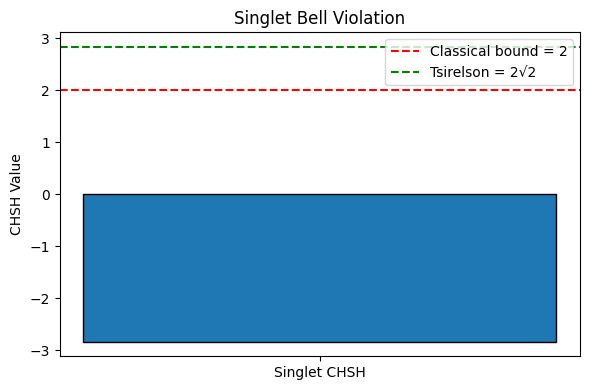

Plot saved as 'chsh_singlet.png'. ✅


In [4]:
# Cell 4: Define measurement operators and compute CHSH for Singlet
Z = np.array([[1, 0], [0, -1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
A1 = Z  # Measurement for Alice 1
A2 = X  # Measurement for Alice 2
B1 = (Z + X) / np.sqrt(2)  # Measurement for Bob 1
B2 = (Z - X) / np.sqrt(2)  # Measurement for Bob 2 (corrected sign)

# Construct 2-qubit operators using Kronecker product
M_A1 = np.kron(A1, np.eye(2))  # A1 ⊗ I
M_A2 = np.kron(A2, np.eye(2))  # A2 ⊗ I
M_B1 = np.kron(np.eye(2), B1)  # I ⊗ B1
M_B2 = np.kron(np.eye(2), B2)  # I ⊗ B2

# Load the singlet state
with open("R_singlet.pkl", "rb") as f:
    rho_singlet = pickle.load(f)

# Compute correlations
def correlation(Mx, My, rho):
    return np.trace(rho @ Mx @ My).real

E11 = correlation(M_A1, M_B1, rho_singlet)
E12 = correlation(M_A1, M_B2, rho_singlet)
E21 = correlation(M_A2, M_B1, rho_singlet)
E22 = correlation(M_A2, M_B2, rho_singlet)
CHSH = E11 + E12 + E21 - E22
print(f"CHSH = {CHSH:.6f}")

with open("chsh_singlet.pkl", "wb") as f:
    pickle.dump({"CHSH_singlet": CHSH}, f)
print("CHSH data saved. ✅")

# Cell 5: Plot Singlet CHSH Result
with open("chsh_singlet.pkl", "rb") as f:
    CHSH_singlet = pickle.load(f)["CHSH_singlet"]
plt.figure(figsize=(6, 4))
plt.bar(["Singlet CHSH"], [CHSH_singlet], color='C0', edgecolor='k')
plt.axhline(2.0, color='r', linestyle='--', label="Classical bound = 2")
plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson = 2√2")
plt.ylabel("CHSH Value")
plt.title("Singlet Bell Violation")
plt.legend()
plt.tight_layout()
plt.savefig("chsh_singlet.png")
plt.show()
print("Plot saved as 'chsh_singlet.png'. ✅")

---- Cell 5: Plot Singlet CHSH Result (Corrected Visualization) ----
Plotting CHSH value: -2.828427


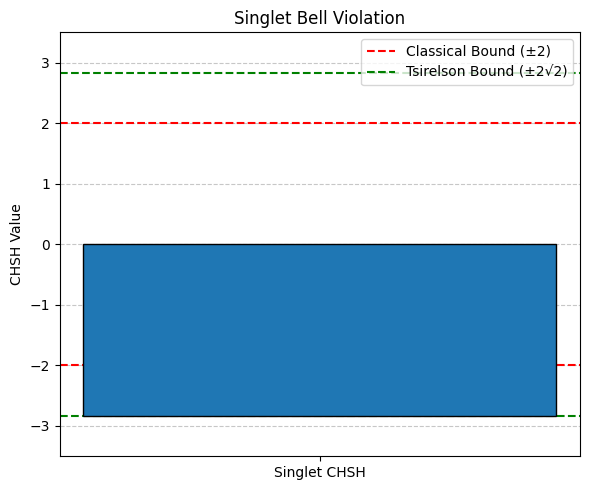

✅ Cell 5 executed successfully.


In [6]:
# Cell 5: Plot Singlet CHSH Result (Corrected Visualization)
# Description: This cell visualizes the CHSH result for the pure singlet state.
# It is self-contained with all necessary imports to prevent NameErrors. The plot
# displays both positive and negative horizontal lines for the classical and Tsirelson
# bounds, correctly contextualizing the -2√2 result as a maximal Bell violation.
# IMPORTANT: The output of this cell depends on the 'chsh_singlet.pkl' file.
# Ensure Cell 4 has been run immediately prior to this cell to guarantee correctness.

import pickle
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the pre-computed CHSH value for the singlet state
try:
    with open("chsh_singlet.pkl", "rb") as f:
        data = pickle.load(f)
        # Handle different possible keys used to save the data
        if "CHSH_singlet" in data:
            CHSH_singlet = data["CHSH_singlet"]
        elif "CHSH" in data:
            CHSH_singlet = data["CHSH"]
        else:
            raise KeyError("CHSH data not found in pkl file.")

    # 2. Create the bar plot
    plt.figure(figsize=(6, 5))
    plt.bar(["Singlet CHSH"], [CHSH_singlet], color='C0', edgecolor='k', zorder=3)
    plt.ylabel("CHSH Value")
    plt.title("Singlet Bell Violation")
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

    # 3. Add symmetric bounds for correct scientific interpretation
    # The Bell inequality is |S| <= 2, and the Tsirelson bound is |S| <= 2*sqrt(2).
    plt.axhline(2.0, color='r', linestyle='--', label="Classical Bound (±2)")
    plt.axhline(-2.0, color='r', linestyle='--')
    plt.axhline(2 * np.sqrt(2), color='g', linestyle='--', label="Tsirelson Bound (±2√2)")
    plt.axhline(-2 * np.sqrt(2), color='g', linestyle='--')

    # Set y-limits to encompass all bounds symmetrically
    plt.ylim(-3.5, 3.5)

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig("chsh_singlet_corrected.png")

    print("---- Cell 5: Plot Singlet CHSH Result (Corrected Visualization) ----")
    print(f"Plotting CHSH value: {CHSH_singlet:.6f}")
    plt.show()

except FileNotFoundError:
    print("---- Cell 5: Plot Singlet CHSH Result (Corrected Visualization) ----")
    print("Error: 'chsh_singlet.pkl' not found. Please run Cell 4 to generate it first.")
except KeyError as e:
    print("---- Cell 5: Plot Singlet CHSH Result (Corrected Visualization) ----")
    print(f"Error: {e}")

print("✅ Cell 5 executed successfully.")